<a href="https://colab.research.google.com/github/yodavo/IAI_vaccines/blob/main/data_wrangling/10Aug_Limpieza_de_datos(Angel).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title **Importación de bibliotecas y funciones**
#@markdown -----------------------------------------
# Instalar paquetes no disponibles
!pip install squarify

# Para importar la data
import os

# Importar para manipulacion de datos
import numpy as np
import pandas as pd
from statistics import *

# Importar para Visualizacion 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings # para evitar warnings
warnings.filterwarnings('ignore')
import textwrap
from textwrap import wrap
import squarify
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from termcolor import cprint, colored
### GENERACIÓN DE WORDCLOUD
from PIL import Image
import wordcloud
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importar Dependencias
%matplotlib inline
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# CARGA Y REVISION PRELIMINAR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Carga de datos
###colocar la ruta de la carpeta dónde estén guardados los tres archivos .csv
os.chdir('/content/drive/MyDrive/DIPLOMADO BIGDATA/MODULO V/COVID-19 World Adverse Reactions/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DIMENSIONES DE LAS DATAS OBTENIDAS
2021VAERSDATA.csv :     (428486, 34)
2021VAERSSYMPTOMS.csv:  (575022, 10)
2021VAERSVAX.csv:       (445358, 7)

 DATA COMBINADA :     (600588, 51)

VACUNAS CONTENIDAS EN LA BASE DE DATOS


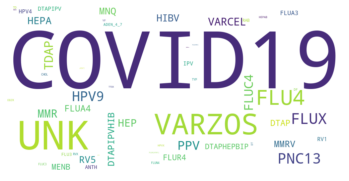

In [ ]:
#@title **Datas obtenidas de vacunas** 
#@markdown ----------------------------------------

data = pd.read_csv('2021VAERSDATA.csv', index_col=0, encoding='latin-1')
symptom = pd.read_csv('2021VAERSSYMPTOMS.csv', index_col=0, encoding='latin-1')
vax = pd.read_csv('2021VAERSVAX.csv', index_col=0, encoding='latin-1')

cprint('DIMENSIONES DE LAS DATAS OBTENIDAS', color='blue', on_color='on_white', attrs=['bold'])
cprint('2021VAERSDATA.csv :     '+str(data.shape), color='green')
cprint('2021VAERSSYMPTOMS.csv:  '+str(symptom.shape), color='green')
cprint('2021VAERSVAX.csv:       '+str(vax.shape), color='green')

# combinando datasets en un solo dataframe
df = pd.merge(data, symptom, on='VAERS_ID')
df = pd.merge(df, vax, on='VAERS_ID')
cprint('\n DATA COMBINADA :     '+str(df.shape), color='blue',on_color='on_white',attrs=['bold'])

# haciendo una copia por si hay errores
dataset = df.copy()
#dataset.VAX_TYPE.unique() # revisando el tipo de vacunas disponibles en el dataset

### VACUNAS REGISTRADAS EN LA BASE DE DATOS
word_counts = collections.Counter(list(dataset['VAX_TYPE'])) # Hacer estadísticas de frecuencia de palabras para la segmentación de palabras

###GENERAR WORDCLOUD
cprint('\nVACUNAS CONTENIDAS EN LA BASE DE DATOS', color='red',on_color='on_yellow', attrs=['bold'])
cloud = wordcloud.WordCloud(background_color="white", max_font_size=600, max_words=100, width = 1000, height = 500)
wordcloud_vax=cloud.generate_from_frequencies(word_counts)
plt.imshow(wordcloud_vax, interpolation='bilinear')
plt.axis("off")
plt.show()



EL DATASET COMBINADO DE VACUNAS REGISTRA :          600588 OBSERVACIONES
EL DATASET AL FILTRAR EL TIPO DE VACUNA A COVID19 : 591241 OBSERVACIONES

LOS REPORTES DE LAS VACUNAS DE COVID19 REPRESENTAN EL 98.44%



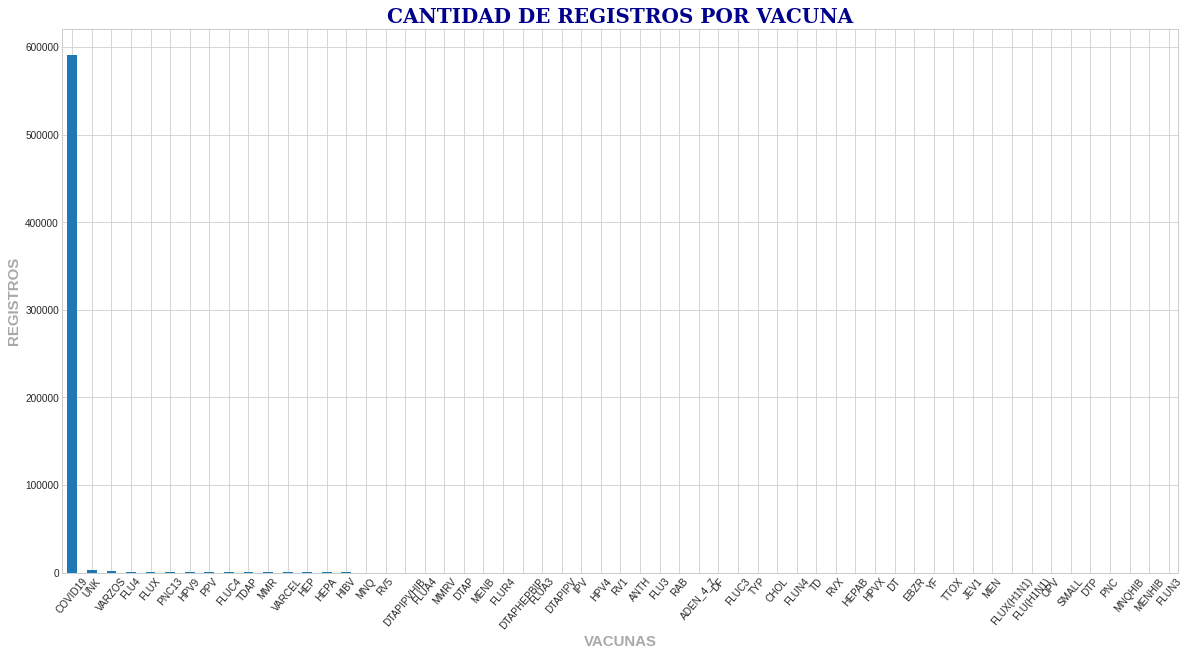

In [ ]:
#@title **GRAFICANDO CANTIDAD DE DATOS DE LA VACUNA COVID 19**
#@markdown ----------------------------------------------

# separando el dataset de vacunas de covid19
dataset_covid = dataset[(dataset['VAX_TYPE'] == 'COVID19')]
cprint("\nEL DATASET COMBINADO DE VACUNAS REGISTRA :          "+str((dataset.shape)[0])+" OBSERVACIONES", color='blue', attrs=['bold'])
cprint("EL DATASET AL FILTRAR EL TIPO DE VACUNA A COVID19 : "+str((dataset_covid.shape)[0])+" OBSERVACIONES", color='blue', attrs=['bold'])
porcentaje=((dataset_covid.shape)[0])/((dataset.shape)[0]) * 100
porcentaje=round(porcentaje, 2) 
cprint("\nLOS REPORTES DE LAS VACUNAS DE COVID19 REPRESENTAN EL "+str(porcentaje)+"%\n", color='red', attrs=['bold'])
### GRAFICANDO CANTIDAD DE VACUNAS
vacunas_reportadas=dataset.groupby('VAX_TYPE')
font = {'family': 'Serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 20,
        }
font1 = {'family': 'sans-serif',
        'color':  'darkgrey',
        'weight': 'bold',
        'size': 15,
        }
plt.figure(figsize=(20,10))
vacunas_reportadas.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title("CANTIDAD DE REGISTROS POR VACUNA", fontdict=font)
plt.xlabel("VACUNAS",fontdict=font1)
plt.ylabel("REGISTROS",fontdict=font1)
plt.show()





FABRICANTES DE VACUNAS PARA COVID19 REGISTRADOS


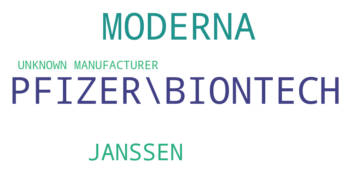

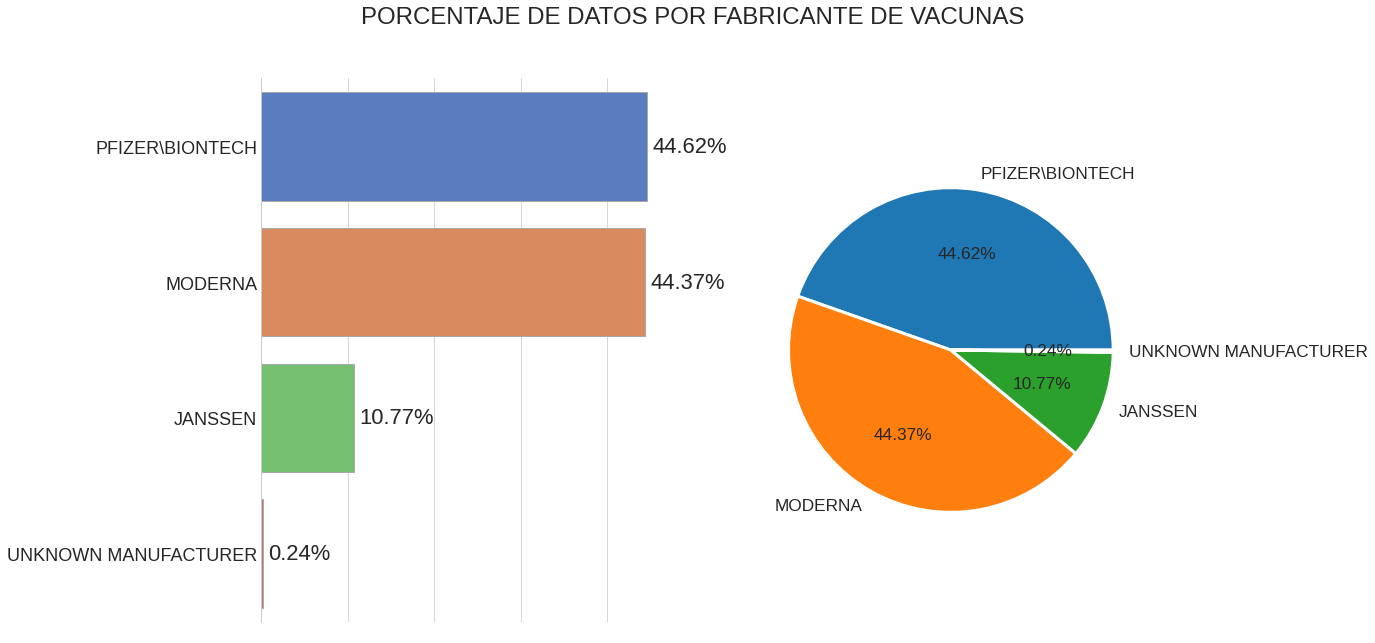

In [ ]:
#@title **FABRICANTES DE VACUNAS PARA COVID 19**
#@markdown -------------------------------
### VACUNAS REGISTRADAS EN LA BASE DE DATOS
word_counts = collections.Counter(list(dataset_covid['VAX_MANU'])) # Hacer estadísticas de frecuencia de palabras para la segmentación de palabras

###GENERAR WORDCLOUD
cprint('\nFABRICANTES DE VACUNAS PARA COVID19 REGISTRADOS', color='red',on_color='on_yellow', attrs=['bold'])
cloud = wordcloud.WordCloud(background_color="white", max_font_size=400, max_words=100, width = 1000, height = 500)
wordcloud_vax=cloud.generate_from_frequencies(word_counts)
plt.imshow(wordcloud_vax, interpolation='bilinear')
plt.axis("off")
plt.show()


### PORCENTAJE EN GRÁFICO
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,10))

sns.barplot(x=round((dataset_covid.VAX_MANU.value_counts()/dataset_covid.shape[0])*100,2), y=dataset_covid.VAX_MANU.value_counts().index,
           palette='muted', edgecolor='darkgray', ax=ax[0])
annot=round((dataset_covid.VAX_MANU.value_counts()/dataset_covid.shape[0])*100,2)

for p in ax[0].patches:
    width = p.get_width()
    annot = width.astype('str')
    ax[0].annotate(annot+'%', xy=(p.get_width(), p.get_y()+p.get_height()/2), fontsize=22,
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    
ax[0].tick_params(axis='y', labelsize=18)
ax[0].tick_params(axis='x', labelbottom=False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_xlabel(" ")

labels = list(dataset_covid.VAX_MANU.value_counts().index)
ax[1].pie(round((dataset_covid.VAX_MANU.value_counts()/dataset_covid.shape[0])*100,2), labels=labels, 
         autopct = '%1.2f%%', textprops={'size': 'xx-large'}, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

plt.suptitle('PORCENTAJE DE DATOS POR FABRICANTE DE VACUNAS', fontsize=24)
plt.show()



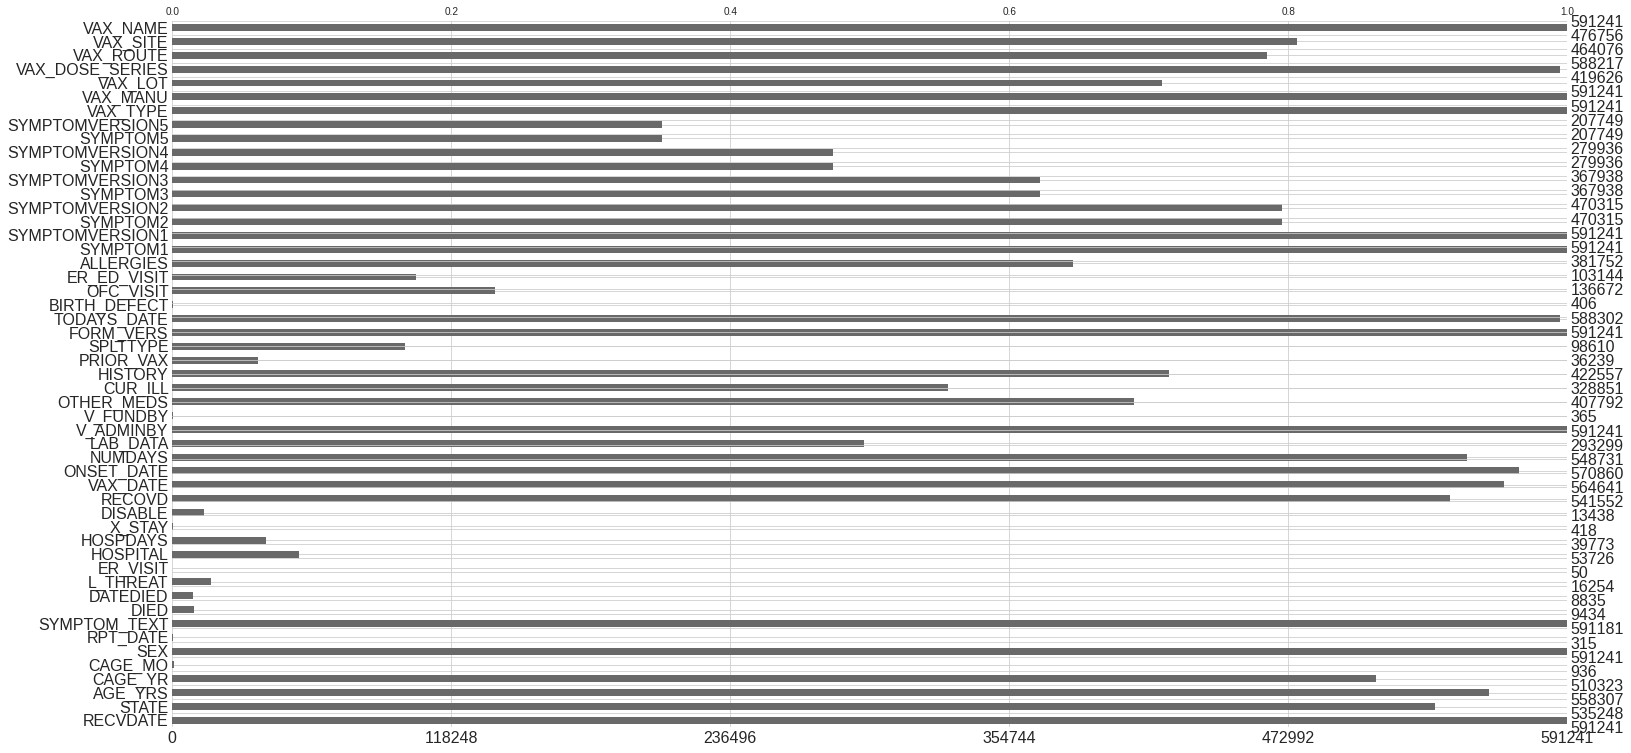

In [ ]:
#@title **SIN EMBARGO LA DATA NO ES  UNIFORME**
msno.bar(dataset_covid)
plt.show()

# LIMPIEZA DE DATOS DE ACUERDO AL OBJETIVO DE ESTUDIO


VISUALIZACIÓN DEL DATASET


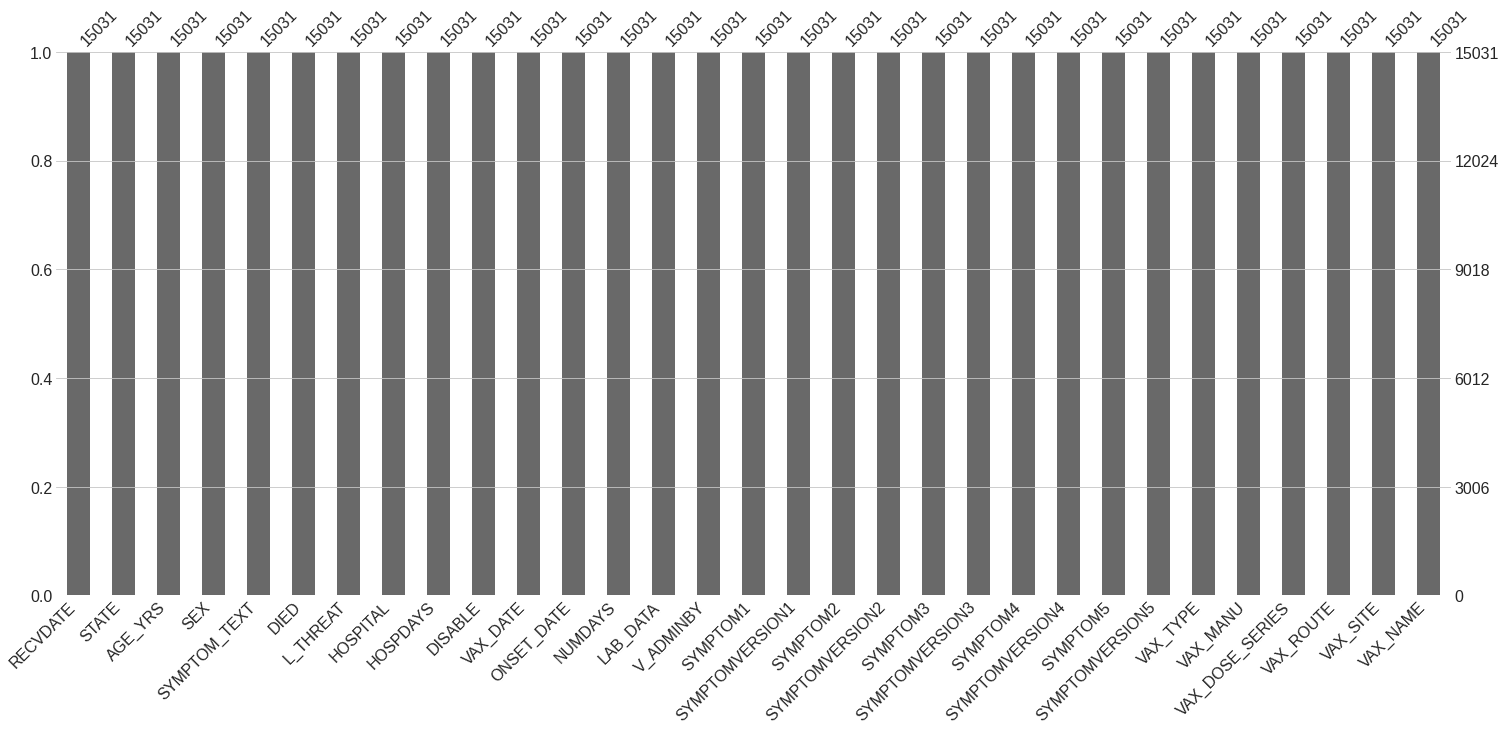



INFORMACIÓN DE LAS VARIABLES
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 916809 to 1497550
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RECVDATE         15031 non-null  object 
 1   STATE            15031 non-null  object 
 2   AGE_YRS          15031 non-null  float64
 3   SEX              15031 non-null  object 
 4   SYMPTOM_TEXT     15031 non-null  object 
 5   DIED             15031 non-null  int64  
 6   L_THREAT         15031 non-null  int64  
 7   HOSPITAL         15031 non-null  object 
 8   HOSPDAYS         15031 non-null  float64
 9   DISABLE          15031 non-null  int64  
 10  VAX_DATE         15031 non-null  object 
 11  ONSET_DATE       15031 non-null  object 
 12  NUMDAYS          15031 non-null  float64
 13  LAB_DATA         15031 non-null  object 
 14  V_ADMINBY        15031 non-null  object 
 15  SYMPTOM1         15031 non-null  object 
 16  SYMPTOMVERSION1  150

In [ ]:
#@title ** LIMPIEZA DE DATASET**
### OBSERVACIONES SIN EDAD, SIN INFORMACIÓN DE HOSPITALIZACIÓN O DÍAS HOSPITALIZADOS.
dataset_hospitalizados=dataset_covid.copy()
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['AGE_YRS'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['HOSPDAYS'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['HOSPITAL'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['STATE'].notna()]
###OBSERVACIONES SIN SINTOMAS:
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['SYMPTOM1'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['SYMPTOM2'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['SYMPTOM3'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['SYMPTOM4'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['SYMPTOM5'].notna()]
### OBSERVACIONES SIN NÚMERO DE DOSIS ADMINISTRADA CONOCIDA
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['VAX_DOSE_SERIES'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['VAX_SITE'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['VAX_ROUTE'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['VAX_DATE'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['NUMDAYS'].notna()]
### observaciones incompletas:
#dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['ALLERGIES'].notna()]
dataset_hospitalizados=dataset_hospitalizados[dataset_hospitalizados['LAB_DATA'].notna()]
### ELIMINACIÓN DE COLUMNAS SIN VALOR INFORMATIVO:
dataset_hospitalizados.drop(['CAGE_YR', 'CAGE_MO','RPT_DATE','V_FUNDBY','ER_VISIT', 'X_STAY',  'RECOVD',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE','TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_LOT','DATEDIED', 'FORM_VERS'],axis=1, inplace=True)

### SEGÚN VAERS : • Died (DIED): If the vaccine recipient died a "Y" is used; otherwise the field will be blank.
dataset_hospitalizados['DIED']=dataset_hospitalizados['DIED'].apply(lambda x : 1 if x is 'Y' else 0)
### Life Threatening (L_THREAT): If the vaccine recipient had a lifethreatening event associated with the vaccination a "Y" is placed is used; otherwise the field will be blank.
dataset_hospitalizados['L_THREAT']=dataset_hospitalizados['L_THREAT'].apply(lambda x : 1 if x is 'Y' else 0)
### Disability (DISABLE): If the vaccine recipient was disabled as a result of the vaccination a "Y" is placed in this field; otherwise the field will be blank.
dataset_hospitalizados['DISABLE']=dataset_hospitalizados['DISABLE'].apply(lambda x : 1 if x is 'Y' else 0)
cprint("VISUALIZACIÓN DEL DATASET", color='cyan', on_color='on_white', attrs=['bold'])
msno.bar(dataset_hospitalizados)
plt.show()
print('\n')
cprint("INFORMACIÓN DE LAS VARIABLES", color='cyan', on_color='on_white', attrs=['bold'])
print(dataset_hospitalizados.info())

# EXPLORACIÓN DE DATOS POR VISUALIZACIÓN Y ANÁLISIS.

## PORCENTAJE de DATOS por FABRICANTE DE VACUNAS EN DATASET DE HOSPITALIZADOS


FABRICANTES DE VACUNAS PARA COVID19 REGISTRADOS EN DATASET_HOSPITALIZADOS


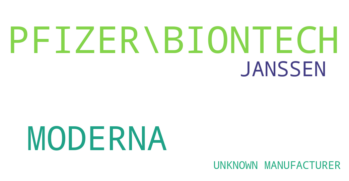

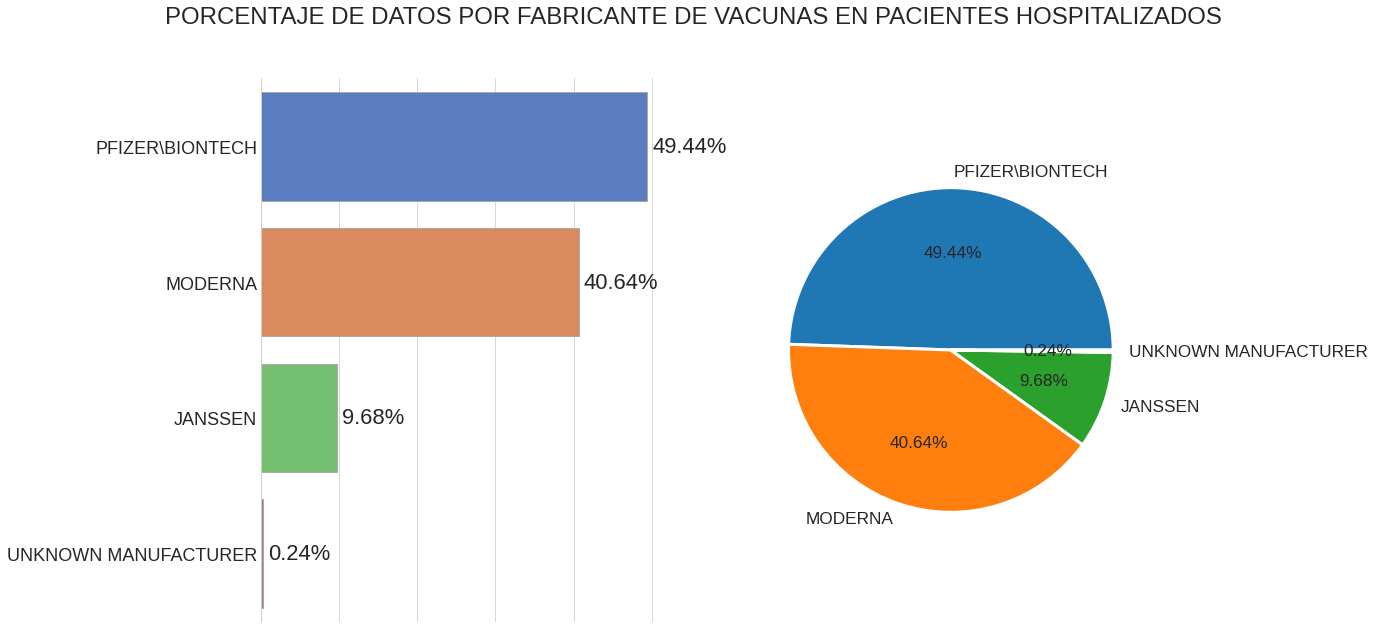

In [ ]:
#@title **FABRICANTES DE VACUNAS PARA COVID 19**
#@markdown -------------------------------
### VACUNAS REGISTRADAS EN LA BASE DE DATOS
word_counts = collections.Counter(list(dataset_hospitalizados['VAX_MANU'])) # Hacer estadísticas de frecuencia de palabras para la segmentación de palabras

###GENERAR WORDCLOUD
cprint('\nFABRICANTES DE VACUNAS PARA COVID19 REGISTRADOS EN DATASET_HOSPITALIZADOS', color='red',on_color='on_yellow', attrs=['bold'])
cloud = wordcloud.WordCloud(background_color="white", max_font_size=400, max_words=100, width = 1000, height = 500)
wordcloud_vax=cloud.generate_from_frequencies(word_counts)
plt.imshow(wordcloud_vax, interpolation='bilinear')
plt.axis("off")
plt.show()


### PORCENTAJE EN GRÁFICO
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,10))

sns.barplot(x=round((dataset_hospitalizados.VAX_MANU.value_counts()/dataset_hospitalizados.shape[0])*100,2), y=dataset_hospitalizados.VAX_MANU.value_counts().index,
           palette='muted', edgecolor='darkgray', ax=ax[0])
annot=round((dataset_hospitalizados.VAX_MANU.value_counts()/dataset_hospitalizados.shape[0])*100,2)

for p in ax[0].patches:
    width = p.get_width()
    annot = width.astype('str')
    ax[0].annotate(annot+'%', xy=(p.get_width(), p.get_y()+p.get_height()/2), fontsize=22,
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    
ax[0].tick_params(axis='y', labelsize=18)
ax[0].tick_params(axis='x', labelbottom=False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_xlabel(" ")

labels = list(dataset_hospitalizados.VAX_MANU.value_counts().index)
ax[1].pie(round((dataset_hospitalizados.VAX_MANU.value_counts()/dataset_hospitalizados.shape[0])*100,2), labels=labels, 
         autopct = '%1.2f%%', textprops={'size': 'xx-large'}, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})

plt.suptitle('PORCENTAJE DE DATOS POR FABRICANTE DE VACUNAS EN PACIENTES HOSPITALIZADOS', fontsize=24)
plt.show()

plt.show()


## Analizando la Edad

AGE_YRS denota la edad del paciente. Los datos tienen 32934 valores nulos. Imputamos los valores nulos con 0. Luego formamos una columna adicional agrupando AGE_YRS de la siguiente manera:

* 0 <AGE_YRS <18 - 'Nino'
* 18 <= AGE_YRS <45 - 'Joven'
* 45 <= AGE_YRS <60 - 'Adulto'
* 60 <= AGE_YRS <80 - 'Adulto mayor'
* = 80 - 'Anciano' Los datos por grupo de edad son los siguientes:

In [ ]:
######################### Imputar los valores nulos con 0 y luego formar un grupo de edad ##########################

dataset_hospitalizados['AGE_YRS'] = dataset_hospitalizados['AGE_YRS'].fillna(0)
dataset_hospitalizados.AGE_YRS.isna().sum()

dataset_hospitalizados.loc[dataset_hospitalizados['AGE_YRS'] == 0, 'AGE'] = 'Desconocido'
dataset_hospitalizados.loc[((dataset_hospitalizados['AGE_YRS']>0) & (dataset_hospitalizados['AGE_YRS']<18)), 'AGE'] = 'Niño'
dataset_hospitalizados.loc[((dataset_hospitalizados['AGE_YRS']>=18) & (dataset_hospitalizados['AGE_YRS']<45)), 'AGE'] = 'Joven'
dataset_hospitalizados.loc[((dataset_hospitalizados['AGE_YRS']>=45) & (dataset_hospitalizados['AGE_YRS']<60)), 'AGE'] = 'Adulto'
dataset_hospitalizados.loc[((dataset_hospitalizados['AGE_YRS']>=60) & (dataset_hospitalizados['AGE_YRS']<80)), 'AGE'] = 'Adulto Mayor'
dataset_hospitalizados.loc[dataset_hospitalizados['AGE_YRS']>=80, 'AGE'] = 'Anciano'

print(dataset_hospitalizados.AGE.value_counts())

Adulto Mayor    5062
Joven           4121
Adulto          3480
Anciano         1601
Niño             767
Name: AGE, dtype: int64


## Separando el dataframe por vacunas para facilitar el Análisis

### Separacion del dataframe

Separamos los datos de 3 fabricantes de vacunas y los almacenamos en DataFrames:
* *mod - Moderna*
* *pf - Pfizer/BioNTech* 
* *Jns - Johnson & Johnson*

In [ ]:
mod = dataset_hospitalizados[dataset_hospitalizados['VAX_MANU'] =='MODERNA'].copy()
pf =  dataset_hospitalizados[dataset_hospitalizados['VAX_MANU'] =='PFIZER\BIONTECH'].copy()
Jns = dataset_hospitalizados[dataset_hospitalizados['VAX_MANU'] =='JANSSEN'].copy()
print('mod(Moderna) tiene {} observaciones'.format(mod.shape[0]))
print('pf(Pfizer/BioNTech) tiene {} observaciones'.format(pf.shape[0]))
print('Jns(Johnson & Johnson tiene {} observaciones'.format(Jns.shape[0]))

mod(Moderna) tiene 6109 observaciones
pf(Pfizer/BioNTech) tiene 7431 observaciones
Jns(Johnson & Johnson tiene 1455 observaciones
